In [1]:
library(jsonlite)
library(randomForest)
library(dplyr)


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘dplyr’

The following object is masked from ‘package:randomForest’:

    combine

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
#Chargement du jeu de données
path="/home/user/Documents/STA211-Datamining/Projet_STA/"
Airbnb<-fromJSON(paste(path,"airbnb_V3.json",sep=""))
sapply(Airbnb,class)
summary(Airbnb)


_id           accommodates              bathrooms 
             "integer"            "character"            "character" 
              bed_type               bedrooms                   beds 
           "character"            "character"            "character" 
         property_type              room_type         arrondissement 
           "character"            "character"              "numeric" 
host_identity_verified      host_is_superhost          host_listings 
           "character"            "character"            "character" 
         host_response             host_since          cancel_policy 
           "character"            "character"            "character" 
      instant_bookable        availability_30       availability_365 
           "character"              "integer"              "integer" 
       availability_60        availability_90           first_review 
             "integer"              "integer"            "character" 
           last_review             nb_reviews    score_communication 
           "character"            "character"              "numeric" 
        score_location            score_other      reviews_per_month 
             "numeric"              "numeric"              "numeric" 
           total_price            price_level 
             "numeric"            "character"

      _id           accommodates        bathrooms           bed_type        
 Min.   :    2525   Length:41094       Length:41094       Length:41094      
 1st Qu.: 3688220   Class :character   Class :character   Class :character  
 Median : 7887020   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 8425822                                                           
 3rd Qu.:13304907                                                           
 Max.   :17968815                                                           
   bedrooms             beds           property_type       room_type        
 Length:41094       Length:41094       Length:41094       Length:41094      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

In [3]:
character_vars <- lapply(Airbnb, class) == "character"
Airbnb[, character_vars] <- lapply(Airbnb[, character_vars], as.factor)
#définition de la variable arrondissement comme qualitative
Airbnb$arrondissement <- as.factor(Airbnb$arrondissement ) 
sapply(Airbnb,class)

_id           accommodates              bathrooms 
             "integer"               "factor"               "factor" 
              bed_type               bedrooms                   beds 
              "factor"               "factor"               "factor" 
         property_type              room_type         arrondissement 
              "factor"               "factor"               "factor" 
host_identity_verified      host_is_superhost          host_listings 
              "factor"               "factor"               "factor" 
         host_response             host_since          cancel_policy 
              "factor"               "factor"               "factor" 
      instant_bookable        availability_30       availability_365 
              "factor"              "integer"              "integer" 
       availability_60        availability_90           first_review 
             "integer"              "integer"               "factor" 
           last_review             nb_reviews    score_communication 
              "factor"               "factor"              "numeric" 
        score_location            score_other      reviews_per_month 
             "numeric"              "numeric"              "numeric" 
           total_price            price_level 
             "numeric"               "factor"

In [4]:
Airbnb <- subset(Airbnb, select = -c(price_level) )
Airbnb_train <- Airbnb %>% sample_frac(0.3)

In [5]:
summary(Airbnb_train)

      _id           accommodates  bathrooms      bed_type       bedrooms   
 Min.   :    7397   T1 : 459     1-None:   17   Bed  :11017   1-None:2582  
 1st Qu.: 3625769   T2 :5929     2-One :11001   Other:  323   2-One :7354  
 Median : 7748078   T3 :1265     3-Many: 1310   Sofa :  988   3-Many:2392  
 Mean   : 8383237   T4 :3235                                               
 3rd Qu.:13245333   T5+:1440                                               
 Max.   :17968798                                                          
                                                                           
       beds        property_type     room_type     arrondissement
 1-One   :6896   Apartment:11828   Entire :10734   18     :1340  
 2-Two   :3632   House    :  114   Private: 1510   11     :1234  
 3-More_2:1800   Loft     :  143   Shared :   84   10     : 872  
                 Other    :  123                   15     : 852  
                 Service  :  120                   17     : 75

In [6]:
AirbnbRF <- randomForest(total_price~.,Airbnb_train[2:28], na.action = na.roughfix)
print(AirbnbRF)


Call:
 randomForest(formula = total_price ~ ., data = Airbnb_train[2:28],      na.action = na.roughfix) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 8

          Mean of squared residuals: 2938.495
                    % Var explained: 62.75


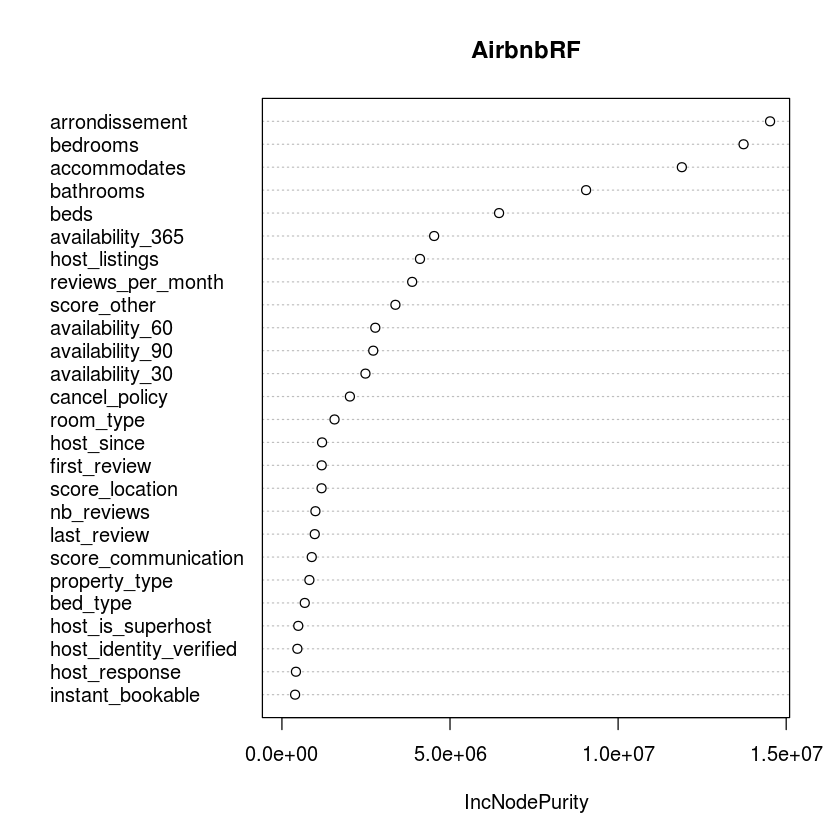

In [7]:
varImpPlot(AirbnbRF)


Call:
 randomForest(formula = total_price ~ ., data = Airbnb_train[2:28],      ntree = 5000, mtry = 2, na.action = na.roughfix) 
               Type of random forest: regression
                     Number of trees: 5000
No. of variables tried at each split: 2

          Mean of squared residuals: 3168.037
                    % Var explained: 59.84


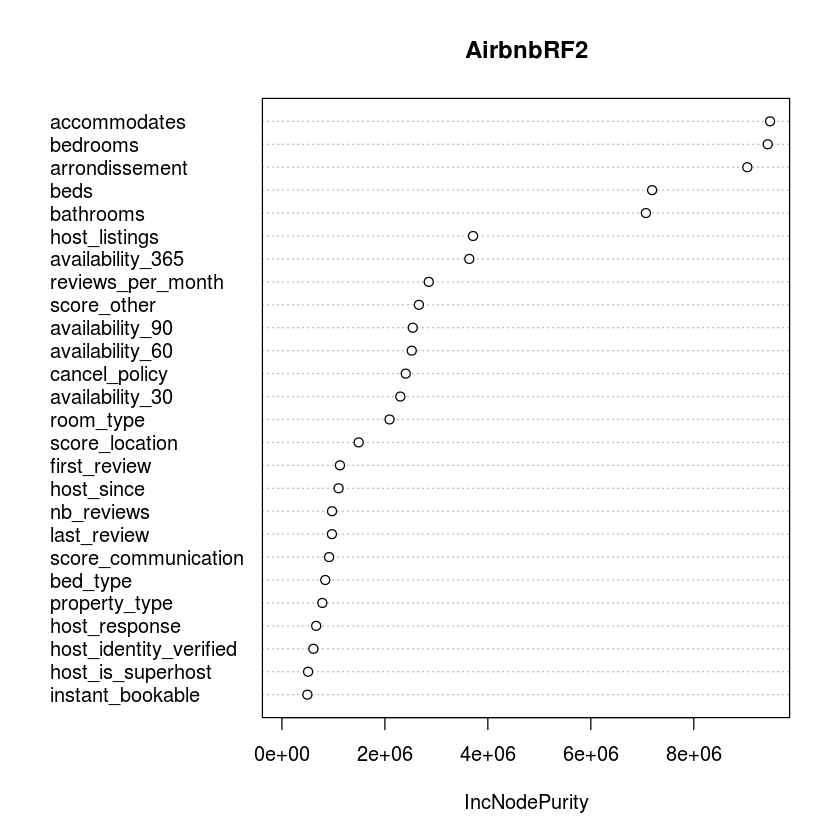

In [8]:
AirbnbRF2 <- randomForest(total_price~.,Airbnb_train[2:28], ntree=5000, mtry=2, na.action = na.roughfix)
print(AirbnbRF2)
varImpPlot(AirbnbRF2)


Call:
 randomForest(formula = total_price ~ ., data = Airbnb_train[2:28],      ntree = 200, mtry = 4, na.action = na.roughfix) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 4

          Mean of squared residuals: 2990.943
                    % Var explained: 62.08


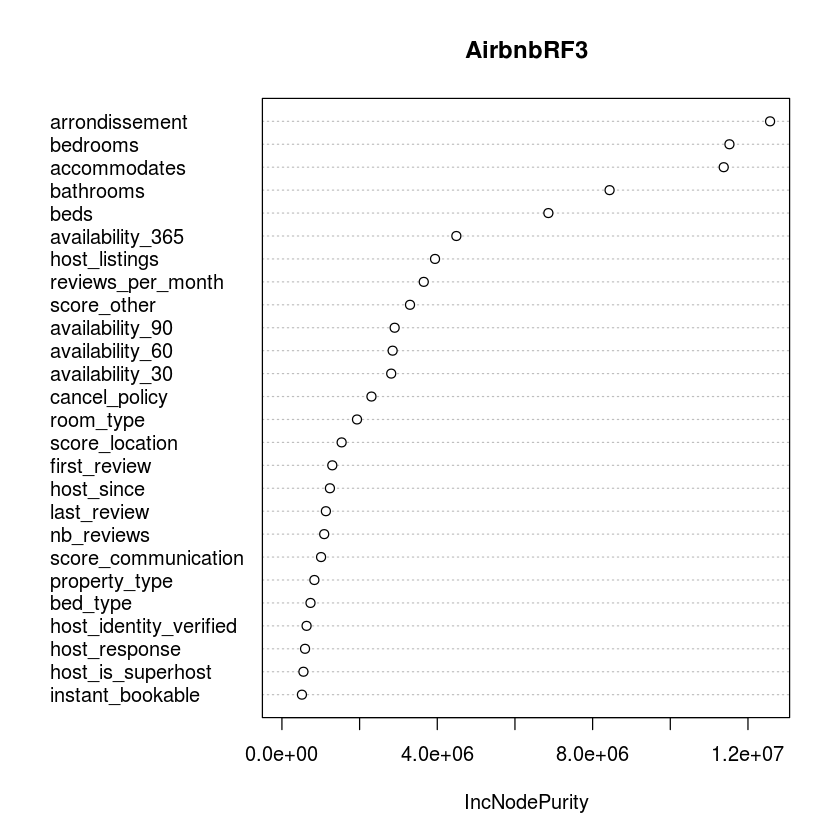

In [9]:
AirbnbRF3 <- randomForest(total_price~.,Airbnb_train[2:28], ntree=200, mtry=4, na.action = na.roughfix)
print(AirbnbRF3)
varImpPlot(AirbnbRF3)

In [33]:
AirbnbRF3$importance[order(AirbnbRF3$importance[, 1], decreasing = TRUE), ]

        arrondissement           accommodates               bedrooms 
             3626121.0              3373149.9              3348036.7 
             bathrooms                   beds       availability_365 
             2423468.7              2012434.6              1302428.7 
     reviews_per_month            score_other          host_listings 
             1022462.4               905858.5               892100.0 
       availability_90        availability_60        availability_30 
              836606.7               792211.6               757459.9 
         cancel_policy              room_type         score_location 
              745541.5               571896.8               505755.0 
            host_since             nb_reviews           first_review 
              366609.9               349550.8               347947.1 
           last_review    score_communication          property_type 
              322704.6               293609.4               279206.7 
host_identity_verifi


Call:
 randomForest(formula = total_price ~ ., data = New_Airbnb_train,      ntree = 5000, mtry = 4, na.action = na.roughfix) 
               Type of random forest: regression
                     Number of trees: 5000
No. of variables tried at each split: 4

          Mean of squared residuals: 2545.337
                    % Var explained: 61.93


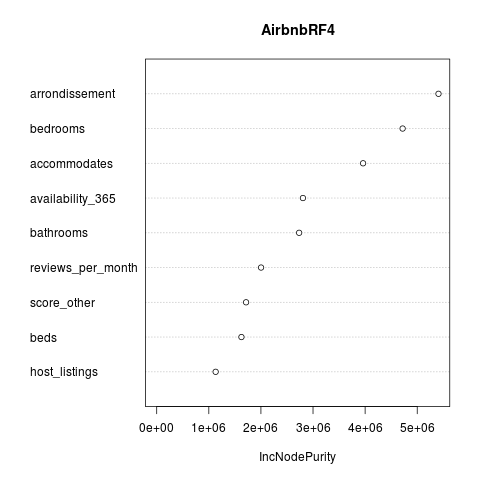

In [34]:
New_Airbnb_train<-select(Airbnb_train,arrondissement, accommodates,bedrooms,bathrooms,beds,availability_365,
                         score_other,reviews_per_month,host_listings,total_price)
AirbnbRF4 <- randomForest(total_price~.,New_Airbnb_train, ntree=5000, mtry=4, na.action = na.roughfix)
print(AirbnbRF4)
varImpPlot(AirbnbRF4)


In [ ]:
# augmenter l'échantillon de départ avec les variables sélectionnées pour voir si amélioration